In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras import models, layers

In [11]:
import matplotlib.pyplot as plt  

In [12]:
print(tf.__version__)

2.19.0


In [13]:
#import matplotlib.pyplot as plt
#import numpy as np

#class_names = dataset.class_names  # Get class labels

#plt.figure(figsize=(10, 10))
#for images, labels in dataset.take(1):  # Take one batch
 #   for i in range(9):  # Show 9 images
  #      ax = plt.subplot(3, 3, i + 1)
   #     plt.imshow(images[i].numpy().astype("uint8"))
    #    plt.title(class_names[labels[i]])
     #   plt.axis("off")
    #break
#plt.show()


In [14]:
import os

# Set the root directory where you want to search
root_dir = "C:/Users/Lenovo/OneDrive/Desktop/plant_disease"

# Folder names to search for
target_folders = {"Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"}

# Search for folders
found_paths = {}
for dirpath, dirnames, filenames in os.walk(root_dir):
    for folder in target_folders:
        if folder in dirnames:
            found_paths[folder] = os.path.join(dirpath, folder)

# Print results
if found_paths:
    print("Found directories:")
    for folder, path in found_paths.items():
        print(f"{folder}: {path}")
else:
    print("Folders not found!")


Found directories:
Potato___healthy: C:/Users/Lenovo/OneDrive/Desktop/plant_disease\training\Potato___healthy
Potato___Late_blight: C:/Users/Lenovo/OneDrive/Desktop/plant_disease\training\Potato___Late_blight
Potato___Early_blight: C:/Users/Lenovo/OneDrive/Desktop/plant_disease\training\Potato___Early_blight


In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [16]:
# Set the correct dataset path
dataset_path = "C:/Users/Lenovo/OneDrive/Desktop/plant_disease/training"

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [18]:
# Print class names
class_names = dataset.class_names
print("Class Names:", class_names)

Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [19]:
# Print number of batches
print("Total Batches:", len(dataset))

Total Batches: 68


In [20]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 2 0 0 0 0 1]


In [21]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[171. 168. 179.]
  [160. 157. 168.]
  [159. 156. 167.]
  ...
  [188. 185. 194.]
  [212. 209. 218.]
  [211. 208. 217.]]

 [[172. 169. 180.]
  [164. 161. 172.]
  [163. 160. 171.]
  ...
  [191. 188. 197.]
  [194. 191. 200.]
  [189. 186. 195.]]

 [[171. 168. 179.]
  [168. 165. 176.]
  [167. 164. 175.]
  ...
  [198. 195. 204.]
  [190. 187. 196.]
  [188. 185. 194.]]

 ...

 [[132. 125. 133.]
  [138. 131. 139.]
  [143. 136. 144.]
  ...
  [131. 125. 135.]
  [129. 123. 133.]
  [126. 120. 130.]]

 [[134. 127. 135.]
  [128. 121. 129.]
  [141. 134. 142.]
  ...
  [134. 128. 138.]
  [123. 117. 127.]
  [109. 103. 113.]]

 [[140. 133. 141.]
  [147. 140. 148.]
  [147. 140. 148.]
  ...
  [143. 137. 147.]
  [151. 145. 155.]
  [146. 140. 150.]]], shape=(256, 256, 3), dtype=float32)


In [22]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


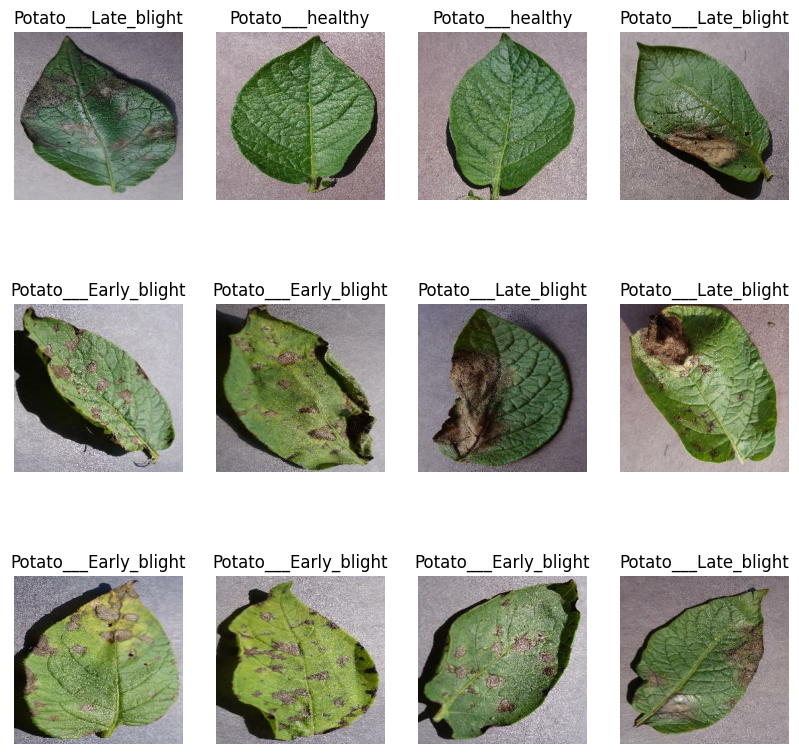

In [23]:
#mix images
import matplotlib.pyplot as plt

# Take one batch of images and labels
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))  # Set the figure size
    for i in range(12):  # Display 12 images
        ax = plt.subplot(3, 4, i+1)  # Create a subplot grid (3x4)
        image = image_batch[i].numpy().astype("uint8")  # Convert tensor to numpy array
        plt.imshow(image)  # Display the image
        plt.title(class_names[label_batch[i].numpy()])  # Set title
        plt.axis("off")  # Hide axis
    plt.show()  # Show all images


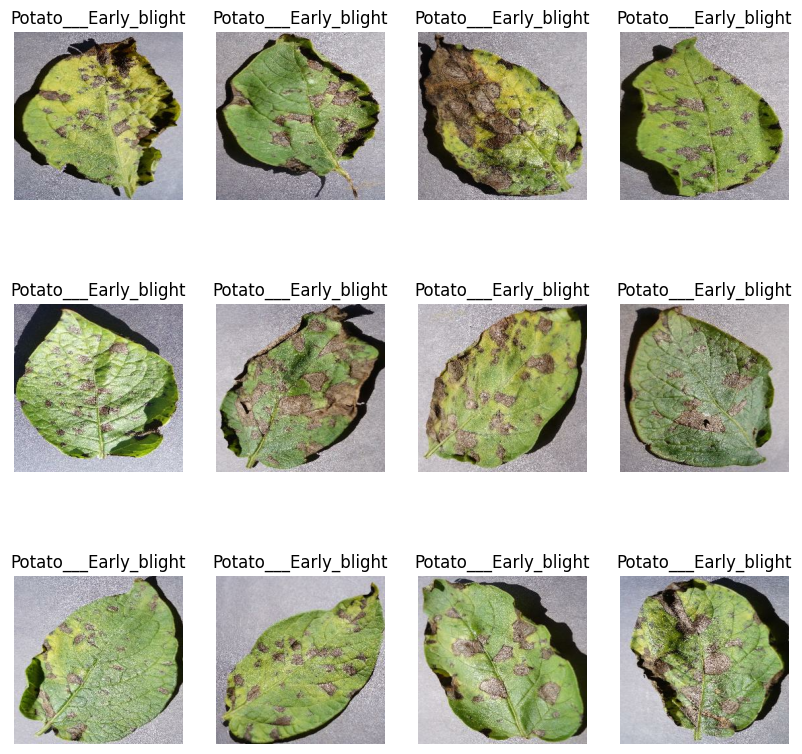

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Set figure size
count = 0  # Counter for displayed images

for image_batch, label_batch in dataset.take(1):  # Take one batch
    for i in range(len(image_batch)):  # Loop through batch
        if label_batch[i].numpy() == 0:  # Only select class 0 images
            count += 1
            ax = plt.subplot(3, 4, count)  # Create a subplot grid (3x4)
            image = image_batch[i].numpy().astype("uint8")  # Convert tensor to numpy
            plt.imshow(image)  # Display the image
            plt.title(class_names[0])  # Set title
            plt.axis("off")  # Hide axis

        if count == 12:  # Stop after 12 images
            break

plt.show()  # Show selected images


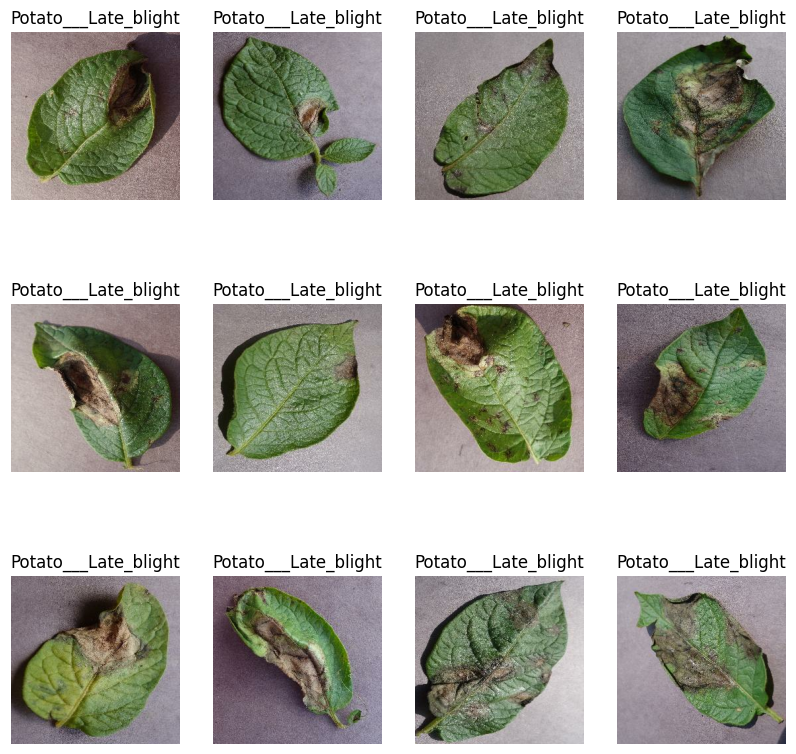

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Set figure size
count = 0  # Counter for displayed images

for image_batch, label_batch in dataset.take(1):  # Take one batch
    for i in range(len(image_batch)):  # Loop through batch
        if label_batch[i].numpy() == 1:  # Only select class 1 images
            count += 1
            ax = plt.subplot(3, 4, count)  # Create a subplot grid (3x4)
            image = image_batch[i].numpy().astype("uint8")  # Convert tensor to numpy
            plt.imshow(image)  # Display the image
            plt.title(class_names[1])  # Set title
            plt.axis("off")  # Hide axis

        if count == 12:  # Stop after 12 images
            break

plt.show()  # Show selected images


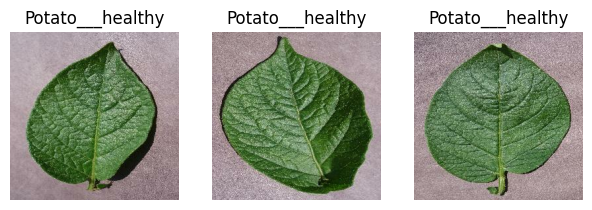

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Set figure size
count = 0  # Counter for displayed images

for image_batch, label_batch in dataset.take(1):  # Take one batch
    for i in range(len(image_batch)):  # Loop through batch
        if label_batch[i].numpy() == 2:  # Only select class 2 images
            count += 1
            ax = plt.subplot(3, 4, count)  # Create a subplot grid (3x4)
            image = image_batch[i].numpy().astype("uint8")  # Convert tensor to numpy
            plt.imshow(image)  # Display the image
            plt.title(class_names[2])  # Set title
            plt.axis("off")  # Hide axis

        if count == 12:  # Stop after 12 images
            break

plt.show()  # Show selected images


In [27]:
len(dataset)

68

In [28]:
#80% ==> training
#20% ==>10% validation, 10% test

In [29]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [30]:
train_ds=dataset.take(54)
len(train_ds)

54

In [31]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [32]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [33]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [34]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [35]:
import tensorflow as tf

IMAGE_SIZE = 256
BATCH_SIZE = 32

dataset_path = "C:/Users/Lenovo/OneDrive/Desktop/plant_disease/training"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [36]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)  # Get the total size of the dataset

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # Shuffle the dataset

    # Compute dataset sizes
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    # Split the dataset
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)  # Remaining data for testing

    return train_ds, val_ds, test_ds


In [37]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

print(f"Training batches: {len(train_ds)}")
print(f"Validation batches: {len(val_ds)}")
print(f"Test batches: {len(test_ds)}")


Training batches: 54
Validation batches: 6
Test batches: 8


In [38]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [40]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [41]:
from tensorflow.keras import layers, models

# Define constants
IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 3

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Explicitly build the model
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)             │ (None, 254, 254, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 127, 127, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_7 (Conv2D)             │ (None, 125, 125, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 62, 62, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_8 (Conv2D)             │ (None, 60, 60, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_9 (Conv2D)             │ (None, 28, 28, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_9               │ (None, 14, 14, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_10 (Conv2D)            │ (None, 12, 12, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_10              │ (None, 6, 6, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_11 (Conv2D)            │ (None, 4, 4, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_11              │ (None, 2, 2, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 64)            │       16,448 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 3)             │          195 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [43]:
EPOCHS = 10  # Set this to your desired number of training epochs

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,  # Ensure BATCH_SIZE is also defined
    verbose=1,
    validation_data=val_ds
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5128 - loss: 2.0129 - val_accuracy: 0.6979 - val_loss: 0.6769
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7259 - loss: 0.6562 - val_accuracy: 0.8542 - val_loss: 0.4024
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8347 - loss: 0.3857 - val_accuracy: 0.7969 - val_loss: 0.5203
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8741 - loss: 0.2984 - val_accuracy: 0.8594 - val_loss: 0.3303
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8823 - loss: 0.2661 - val_accuracy: 0.9427 - val_loss: 0.1584
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9483 - loss: 0.1403 - val_accuracy: 0.9583 - val_loss: 0.1072
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9353 - loss: 0.1761 - val_accuracy: 0.9531 - val_loss: 0.1387
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9465 - loss: 0.1136 - val_accuracy: 0.9792 - val

In [44]:
scores= model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 524ms/step - accuracy: 0.9575 - loss: 0.1437


In [45]:
scores

[0.11199159920215607, 0.96875]

In [46]:
history = model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds

)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9777 - loss: 0.0535 - val_accuracy: 0.9688 - val_loss: 0.1176
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9707 - loss: 0.0820 - val_accuracy: 0.9896 - val_loss: 0.0521
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9848 - loss: 0.0476 - val_accuracy: 0.9583 - val_loss: 0.0957
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9873 - loss: 0.0351 - val_accuracy: 0.9583 - val_loss: 0.1139
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9762 - loss: 0.0693 - val_accuracy: 0.9792 - val_loss: 0.0372
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9859 - loss: 0.0478 - val_accuracy: 0.9792 - val_loss: 0.0390
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9896 - val_loss: 0.0277
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9964 - loss: 0.0103 - val_accuracy: 0.9948 - val

In [47]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.9847 - loss: 0.0769


In [48]:
scores

[0.06571871787309647, 0.98828125]

In [49]:
history 

In [50]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [52]:
history.history['accuracy']


[0.9768518805503845,
 0.9722222089767456,
 0.984375,
 0.9797453880310059,
 0.9814814925193787,
 0.9832175970077515,
 0.9947916865348816,
 0.9936342835426331,
 0.9907407164573669,
 1.0]

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


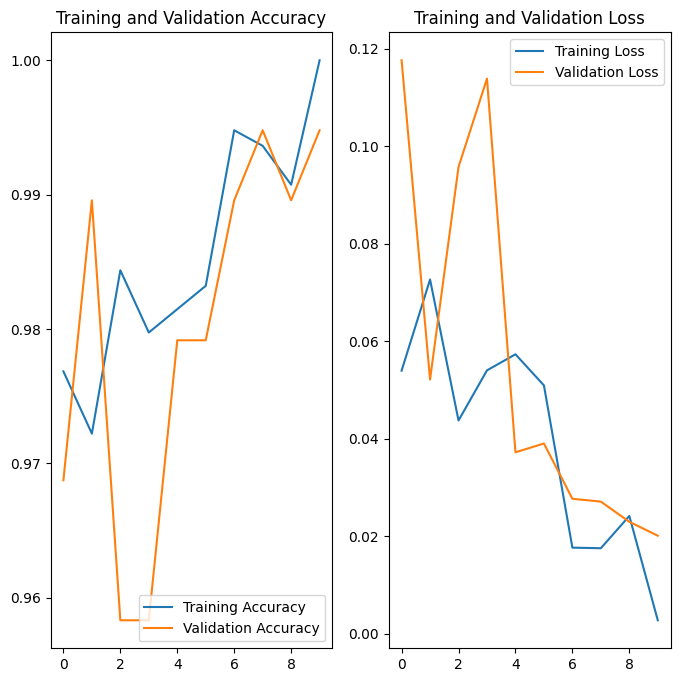

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)  # Correct subplot positioning
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [57]:
import numpy as np

In [58]:
np.argmax(np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-18]))

np.int64(0)

First image to predict:


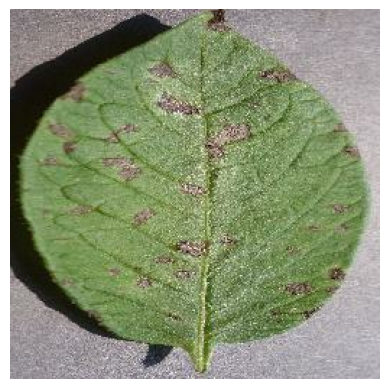

First image's actual label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Predicted Name: Potato___Early_blight


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from test dataset
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')  # Convert to uint8 for visualization
    first_label = labels_batch[0].numpy()  # Get actual label

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")
    plt.show()

    print("First image's actual label:", first_label)

    # Predict on batch
    batch_predictions = model.predict(images_batch)

    # Get predicted class
    predicted_class = np.argmax(batch_predictions[0])  # Take the first image prediction
    print("Predicted Name:", class_names[predicted_class])


In [63]:
import tensorflow as tf
import numpy as np

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to array
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions to match batch format

    predictions = model.predict(img_array)  # Get model predictions

    predicted_class = class_names[np.argmax(predictions[0])]  # Get predicted class
    confidence = round(100 * np.max(predictions[0]), 2)  # Calculate confidence percentage

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


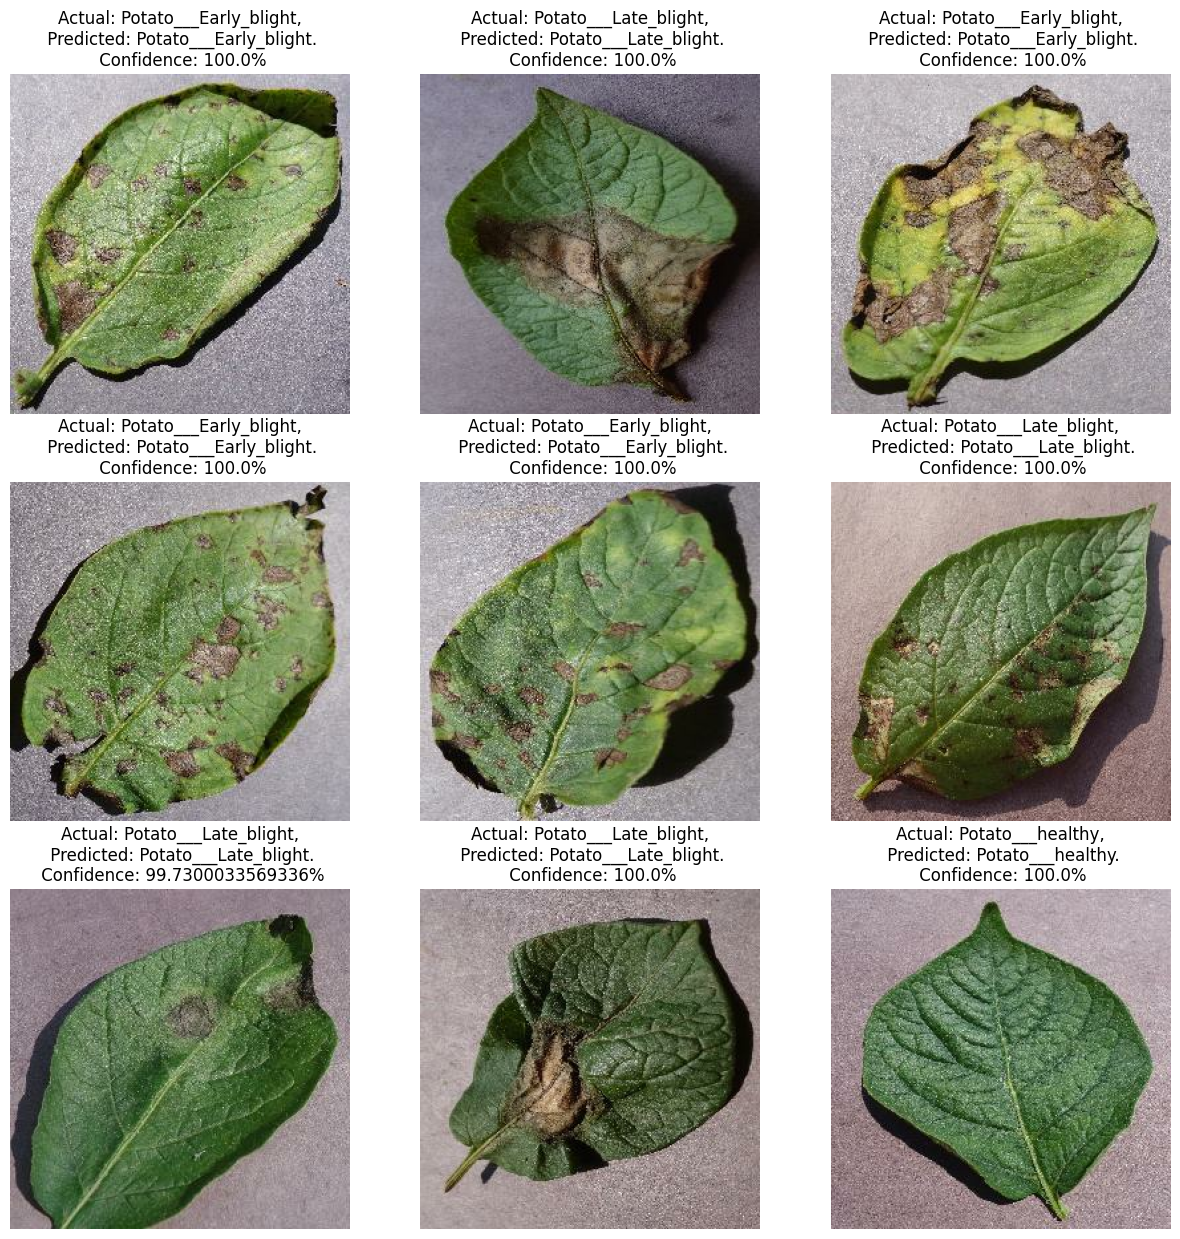

In [64]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        # Fix: Properly closing plt.title()
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


In [66]:
model_version = 1
model.save(f"../models/{model_version}.keras")  # Recommended Keras format


In [67]:
model_version = 2
model.save(f"../models/{model_version}.keras")

In [68]:
import os
os.listdir("../models")

['1.keras', '2.keras']

In [72]:
import os

# Define the models directory
models_dir = "../models"

# Create the directory if it doesn't exist
os.makedirs(models_dir, exist_ok=True)

# Get the latest numeric model version
existing_versions = [int(i.split(".")[0]) for i in os.listdir(models_dir) if i.split(".")[0].isdigit()]
model_version = max(existing_versions + [0]) + 1

# Save the model in .keras format
model.save(f"{models_dir}/{model_version}.keras")

print(f"Model saved as: {models_dir}/{model_version}.keras")


Model saved as: ../models/4.keras
